<a href="https://colab.research.google.com/github/how-to-train-your-model/data-science-portfolio/blob/main/451_A4_Coding_Assignment_Predicting_the_S%26P_500_Index_using_economic_factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4 Coding Assignment: 
Predicting the S&P 500 Index using economic factors


# Libraries

In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# load libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import sweetviz as sv
from sklearn.impute import SimpleImputer
from datetime import datetime


In [ ]:
# Allows for muliple output in one cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Allows for viewing the complete data in a single window 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls -l "/content/drive/My Drive/Colab_Notebooks/MSDS-451/W4"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
total 1953
-rw------- 1 root root 719815 Feb 13 06:01 '451_A4_Pant_Coding Assignment: Predicting the S&P 500 Index using economic factors.docx'
-rw------- 1 root root 952165 Feb 13 04:56 '451_A4_Pant_Coding Assignment: Predicting the S&P 500 Index using economic factors.ipynb'
-rw------- 1 root root  69671 Feb 12 04:56 'MSDS 451 Assignment_03_Chan-1.ipynb'
-rw------- 1 root root 257121 Feb 12 01:24  PredictorData2019.csv


In [ ]:
w4_files = "/content/drive/My Drive/Colab_Notebooks/MSDS-451/W4"
df = pd.read_csv(w4_files+"/PredictorData2019.csv")
df.shape
print("\n\n")

df['yyyymm'] = pd.to_datetime(df['yyyymm'], 
                              format='%Y%m', errors='coerce').dropna()

df.dtypes
df.head(2)



(1788, 18)

yyyymm        datetime64[ns]
Index                 object
D12                  float64
E12                  float64
b/m                  float64
tbl                  float64
AAA                  float64
BAA                  float64
lty                  float64
ntis                 float64
Rfree                float64
infl                 float64
ltr                  float64
corpr                float64
svar                 float64
csp                  float64
CRSP_SPvw            float64
CRSP_SPvwx           float64
dtype: object

,yyyymm,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
0,1871-01-01,4.44,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1871-02-01,4.50,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Question 1
Create appropriate labels and perform EDA on it. Are there any outliers? 

In [ ]:
df1 = df.copy()
df1['dfy'] = df.apply(lambda row: row.BAA + row.AAA, axis=1)


In [ ]:
df1.head(2)


,yyyymm,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx,dfy
0,1871-01-01,4.44,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1871-02-01,4.50,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Labels

In [ ]:
# Defining Labels

df2 = df1.rename(columns={"yyyymm": "Date_YYYYMM"
  , "Index": "SP_500_Index"
  , "D12": "Twel_mon_mov_sums_of_divi"
  , "E12": "Twel_mon_mov_sums_of_earn"
  , "b/m": "Book_to_Market_Ratio"
  , "tbl": "Treasury_Bills"
  , "AAA": "AAA_rated_bonds"
  , "BAA": "BAA_rated_bonds"
  , "lty": "Long_Term_Yield"
  , "ntis": "Net_Equity_Expansion"
  , "Rfree": "Risk_Free_Rate"
  , "infl": "Inflation"
  , "ltr": "Long_Term_Rate_of_Returns"
  , "corpr": "Long_term_corporate_bond_return"
  , "svar": "Stock_Variance"
  , "csp": "Cross-Sectional_Premium"
  , "CRSP_SPvw": "CRSP_SPvw"
  , "CRSP_SPvwx": "CRSP_SPvwx"
  , "dfy": "Default_Yield_Spread"}
  
  )

## EDA

  , "b/m": "Book_to_Market_Ratio"
    
  "lty": "Long_Term_Yield"
  , "ntis": "Net_Equity_Expansion"

    , "E12": "Twel_mon_mov_sums_of_earn"


Index





In [ ]:
df2.head(2)
df_EDA = df2.copy()
df_EDA.dtypes


,Date_YYYYMM,SP_500_Index,Twel_mon_mov_sums_of_divi,Twel_mon_mov_sums_of_earn,Book_to_Market_Ratio,Treasury_Bills,AAA_rated_bonds,BAA_rated_bonds,Long_Term_Yield,Net_Equity_Expansion,Risk_Free_Rate,Inflation,Long_Term_Rate_of_Returns,Long_term_corporate_bond_return,Stock_Variance,Cross-Sectional_Premium,CRSP_SPvw,CRSP_SPvwx,Default_Yield_Spread
0,1871-01-01,4.44,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1871-02-01,4.50,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Date_YYYYMM                        datetime64[ns]
SP_500_Index                               object
Twel_mon_mov_sums_of_divi                 float64
Twel_mon_mov_sums_of_earn                 float64
Book_to_Market_Ratio                      float64
Treasury_Bills                            float64
AAA_rated_bonds                           float64
BAA_rated_bonds                           float64
Long_Term_Yield                           float64
Net_Equity_Expansion                      float64
Risk_Free_Rate                            float64
Inflation                                 float64
Long_Term_Rate_of_Returns                 float64
Long_term_corporate_bond_return           float64
Stock_Variance                            float64
Cross-Sectional_Premium                   float64
CRSP_SPvw                                 float64
CRSP_SPvwx                                float64
Default_Yield_Spread                      float64
dtype: object

In [ ]:
df_EDA['SP_500_Index'] = df_EDA['SP_500_Index'].str.replace(',', '').astype(float)


In [ ]:
print("\n\n Duplicates",df_EDA.duplicated().sum())

# Dropping missing values
#df_EDA = df_EDA.dropna()

# Impute missing values with the mean
#df_EDA.fillna(df_EDA.mean(), inplace=True)

SEED = 20201225 
my_report = sv.analyze(df_EDA)
my_report.show_html()



 Duplicates 0


                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
print("\n\n Missing Values before dropping/Imputing \n",df_EDA.isna().sum())



 Missing Values before dropping/Imputing 
 Date_YYYYMM                           0
SP_500_Index                          0
Twel_mon_mov_sums_of_divi             0
Twel_mon_mov_sums_of_earn             0
Book_to_Market_Ratio                602
Treasury_Bills                      588
AAA_rated_bonds                     576
BAA_rated_bonds                     576
Long_Term_Yield                     576
Net_Equity_Expansion                671
Risk_Free_Rate                        0
Inflation                           505
Long_Term_Rate_of_Returns           660
Long_term_corporate_bond_return     660
Stock_Variance                      169
Cross-Sectional_Premium            1000
CRSP_SPvw                           660
CRSP_SPvwx                          660
Default_Yield_Spread                576
dtype: int64


In [ ]:
df_EDA_dt = df_EDA['Date_YYYYMM']
df_EDA_temp = df_EDA.drop('Date_YYYYMM', axis=1)

# Impute missing values in the other columns using the SimpleImputer
my_imputer = SimpleImputer()
imputed_temp = my_imputer.fit_transform(df_EDA_temp)

# Convert the imputed data back into a DataFrame
imputed_temp_df = pd.DataFrame(imputed_temp, columns=df_EDA_temp.columns)

# Concatenate the two DataFrames back together
df_imputed = pd.concat([df_EDA_dt, imputed_temp_df], axis=1)
df_imputed['Date_YYYYMM'] = pd.to_datetime(df_imputed['Date_YYYYMM'])

print("\n\n Missing Values after Imputing \n",df_imputed.isna().sum())

df_imputed.head(2)
df_EDA.shape
df_imputed.shape
df_imputed.dtypes



 Missing Values after Imputing 
 Date_YYYYMM                        0
SP_500_Index                       0
Twel_mon_mov_sums_of_divi          0
Twel_mon_mov_sums_of_earn          0
Book_to_Market_Ratio               0
Treasury_Bills                     0
AAA_rated_bonds                    0
BAA_rated_bonds                    0
Long_Term_Yield                    0
Net_Equity_Expansion               0
Risk_Free_Rate                     0
Inflation                          0
Long_Term_Rate_of_Returns          0
Long_term_corporate_bond_return    0
Stock_Variance                     0
Cross-Sectional_Premium            0
CRSP_SPvw                          0
CRSP_SPvwx                         0
Default_Yield_Spread               0
dtype: int64


,Date_YYYYMM,SP_500_Index,Twel_mon_mov_sums_of_divi,Twel_mon_mov_sums_of_earn,Book_to_Market_Ratio,Treasury_Bills,AAA_rated_bonds,BAA_rated_bonds,Long_Term_Yield,Net_Equity_Expansion,Risk_Free_Rate,Inflation,Long_Term_Rate_of_Returns,Long_term_corporate_bond_return,Stock_Variance,Cross-Sectional_Premium,CRSP_SPvw,CRSP_SPvwx,Default_Yield_Spread
0,1871-01-01,4.44,0.26,0.4,0.558793,0.034042,0.057263,0.069047,0.05018,0.016456,0.004967,0.00257,0.004793,0.005164,0.00249,0.000364,0.009451,0.006289,0.12631
1,1871-02-01,4.50,0.26,0.4,0.558793,0.034042,0.057263,0.069047,0.05018,0.016456,0.004525,0.00257,0.004793,0.005164,0.00249,0.000364,0.009451,0.006289,0.12631


(1788, 19)

(1788, 19)

Date_YYYYMM                        datetime64[ns]
SP_500_Index                              float64
Twel_mon_mov_sums_of_divi                 float64
Twel_mon_mov_sums_of_earn                 float64
Book_to_Market_Ratio                      float64
Treasury_Bills                            float64
AAA_rated_bonds                           float64
BAA_rated_bonds                           float64
Long_Term_Yield                           float64
Net_Equity_Expansion                      float64
Risk_Free_Rate                            float64
Inflation                                 float64
Long_Term_Rate_of_Returns                 float64
Long_term_corporate_bond_return           float64
Stock_Variance                            float64
Cross-Sectional_Premium                   float64
CRSP_SPvw                                 float64
CRSP_SPvwx                                float64
Default_Yield_Spread                      float64
dtype: object

In [ ]:
df_EDA = df_imputed.copy()


In [ ]:
print("\n\n isinf", df_EDA.isin([np.inf, -np.inf]).any().any())

# df_EDA.shape
# # Dropping missing values
# df_EDA = df_EDA.replace([np.inf, -np.inf], np.nan).dropna().dropna()
# df_EDA.shape



 isinf False


<Figure size 2000x1600 with 0 Axes>

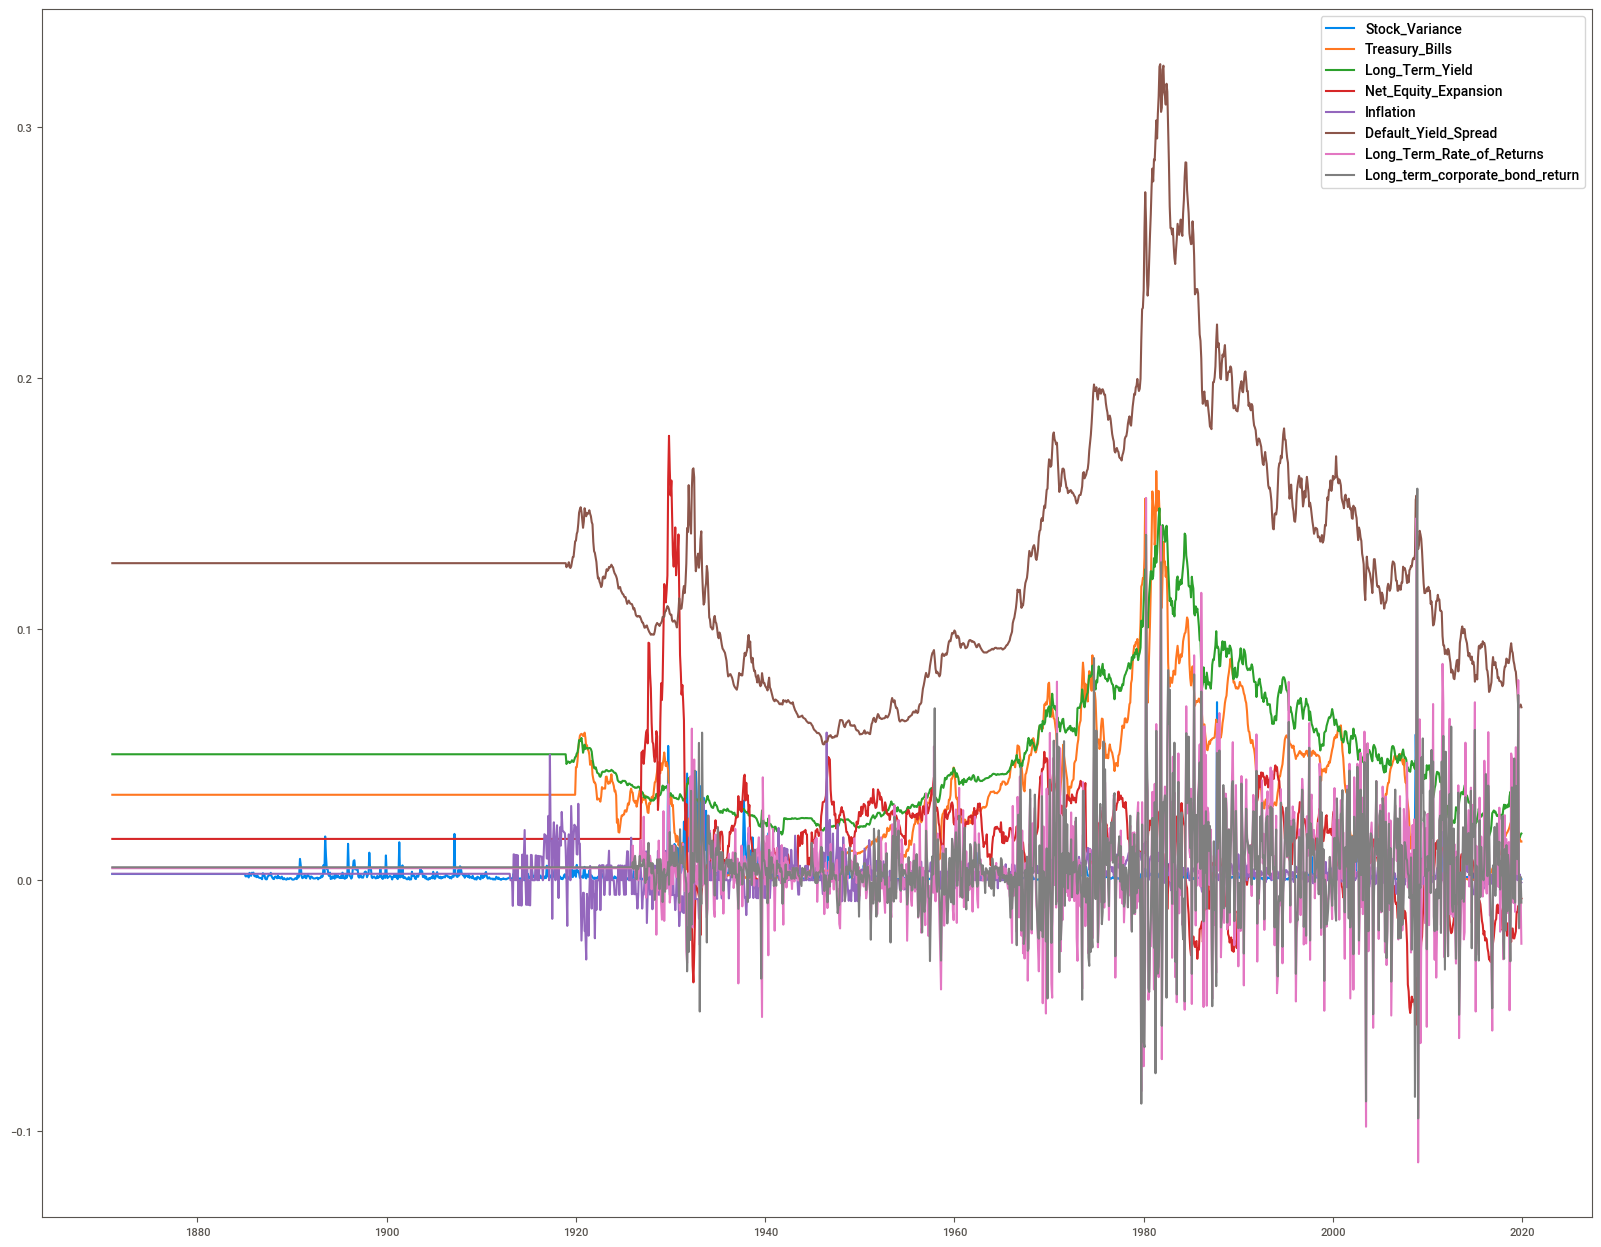

In [ ]:

plt.figure(figsize=(20, 16))

# Plot a histogram of a variable
#sns.histplot(df_EDA['Stock_Variance'])

plt.plot('Date_YYYYMM', 'Stock_Variance', label = "Stock_Variance", data=df_EDA)
plt.plot('Date_YYYYMM', 'Treasury_Bills', label = "Treasury_Bills", data=df_EDA)
plt.plot('Date_YYYYMM', 'Long_Term_Yield', label = "Long_Term_Yield", data=df_EDA)
plt.plot('Date_YYYYMM', 'Net_Equity_Expansion', label = "Net_Equity_Expansion", data=df_EDA)
plt.plot('Date_YYYYMM', 'Inflation', label = "Inflation", data=df_EDA)
plt.plot('Date_YYYYMM', 'Default_Yield_Spread', label = "Default_Yield_Spread", data=df_EDA)
plt.plot('Date_YYYYMM', 'Long_Term_Rate_of_Returns', label = "Long_Term_Rate_of_Returns", data=df_EDA)
plt.plot('Date_YYYYMM', 'Long_term_corporate_bond_return', label = "Long_term_corporate_bond_return", data=df_EDA)


plt.legend()
plt.show()



## Outliers

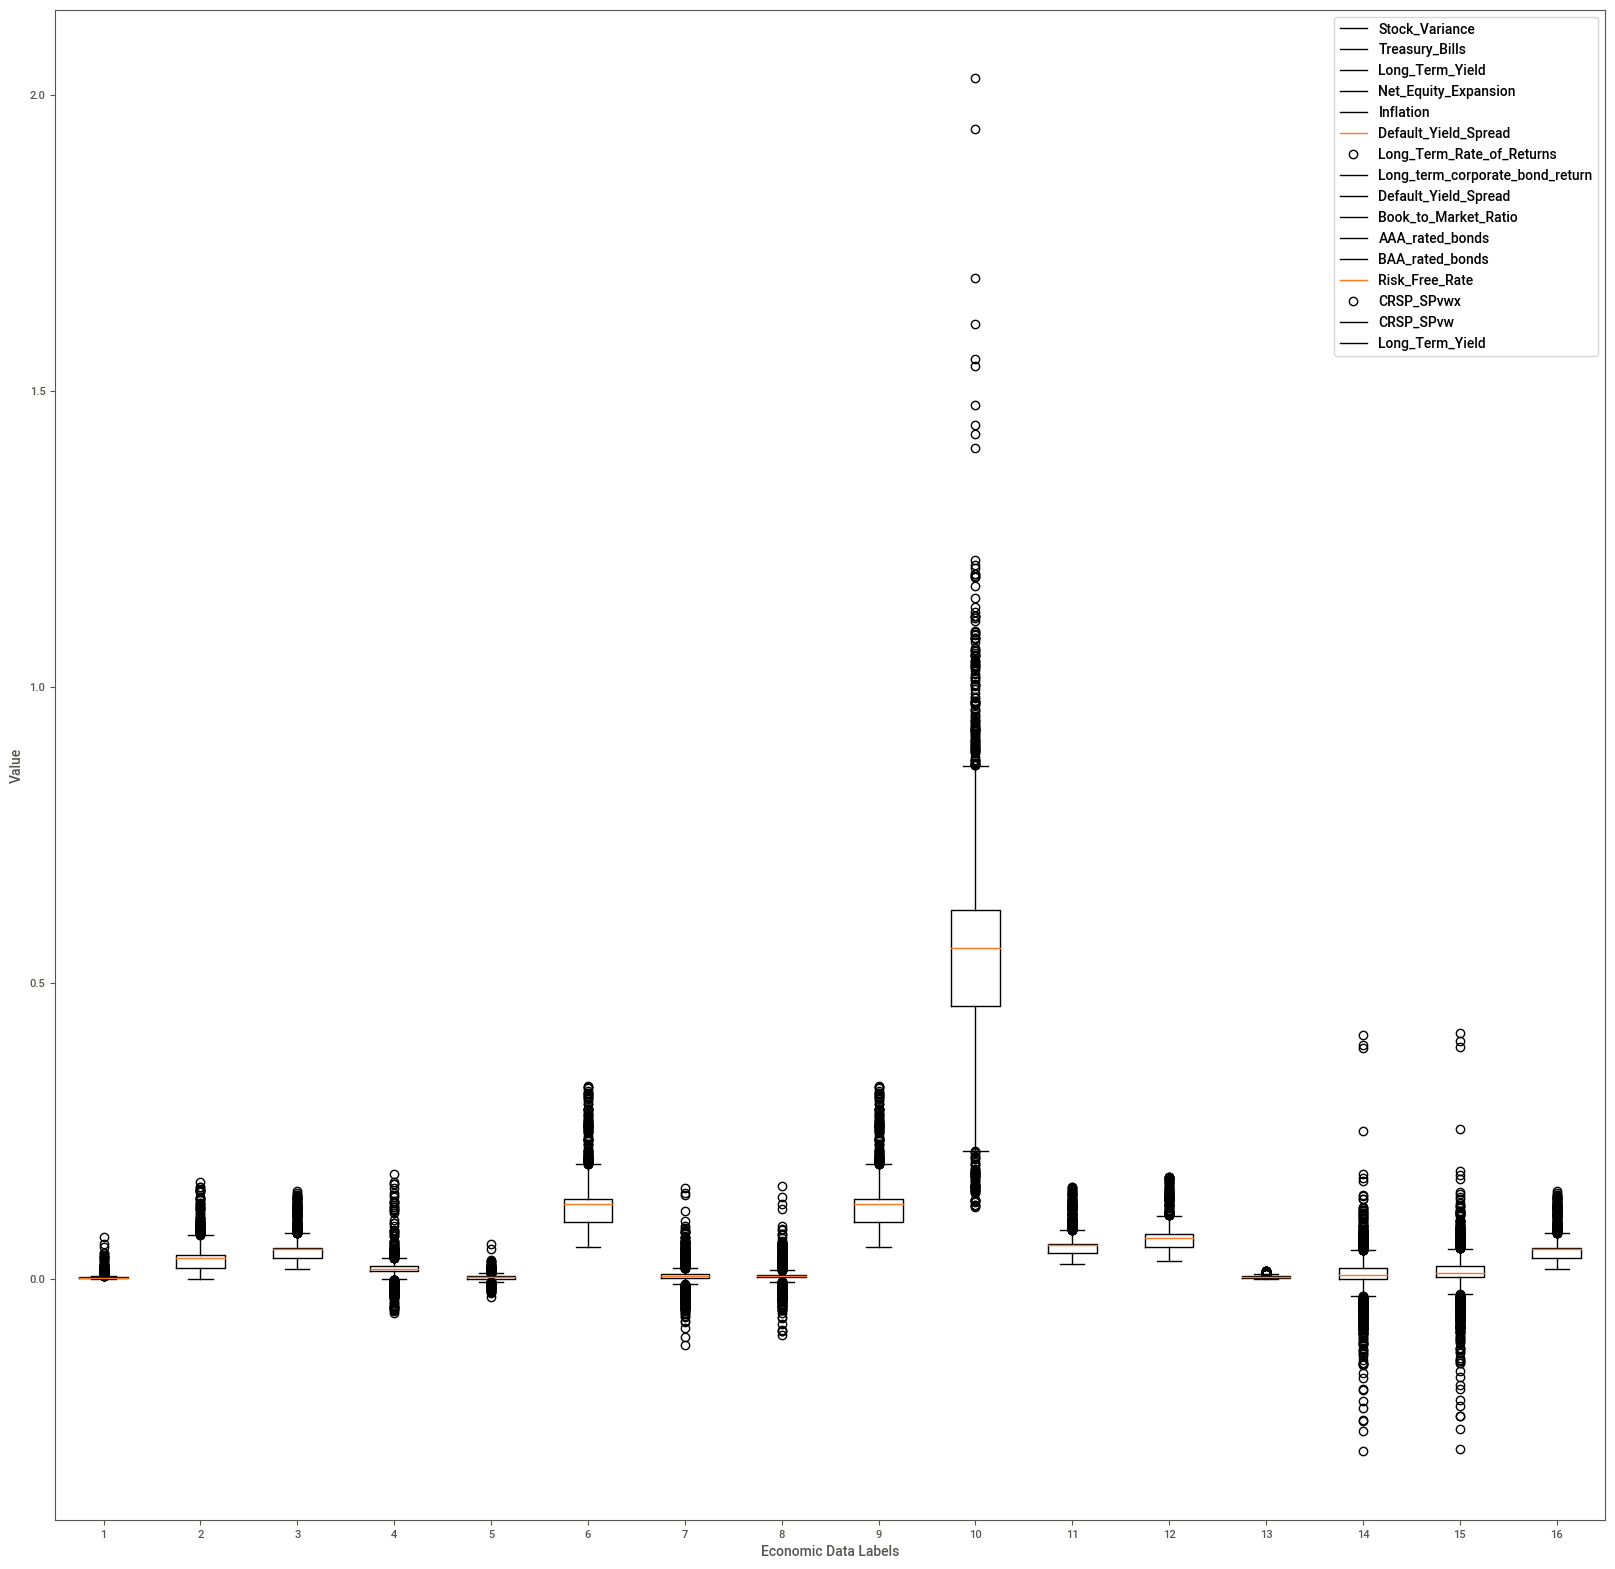

In [ ]:
plt.figure(figsize=(20, 20))

# Plot a box plot for multiple columns
plt.boxplot([df_EDA['Stock_Variance'], 
             df_EDA['Treasury_Bills'], df_EDA['Long_Term_Yield'],
             df_EDA['Net_Equity_Expansion'], df_EDA['Inflation'],
             df_EDA['Default_Yield_Spread'], df_EDA['Long_Term_Rate_of_Returns'],
             df_EDA['Long_term_corporate_bond_return'], 
             #df_EDA['12_mon_moving_sums_of_dividend'], 
             df_EDA['Default_Yield_Spread'],
             #df_EDA['12_mon_moving_sums_of_earnings'],
             df_EDA['Book_to_Market_Ratio'],
             df_EDA['AAA_rated_bonds'], df_EDA['BAA_rated_bonds'],
             df_EDA['Risk_Free_Rate'], df_EDA['CRSP_SPvwx'],
             df_EDA['CRSP_SPvw'], df_EDA['Long_Term_Yield']
             
             ])

# Add a title and labels to the plot
plt.xlabel('Economic Data Labels')
plt.ylabel('Value')

# Add a legend to the plot
plt.legend(['Stock_Variance',
'Treasury_Bills','Long_Term_Yield',
'Net_Equity_Expansion','Inflation',
'Default_Yield_Spread','Long_Term_Rate_of_Returns',
'Long_term_corporate_bond_return',
#'12_mon_moving_sums_of_dividend',
'Default_Yield_Spread',
#'12_mon_moving_sums_of_earnings',
'Book_to_Market_Ratio',
'AAA_rated_bonds','BAA_rated_bonds',
'Risk_Free_Rate','CRSP_SPvwx',
'CRSP_SPvw','Long_Term_Yield'])

# Show the plot
plt.show();




In [ ]:
col = df_EDA.columns.tolist()
col.remove('Date_YYYYMM')
col.remove('SP_500_Index')
print(col)


['Twel_mon_mov_sums_of_divi', 'Twel_mon_mov_sums_of_earn', 'Book_to_Market_Ratio', 'Treasury_Bills', 'AAA_rated_bonds', 'BAA_rated_bonds', 'Long_Term_Yield', 'Net_Equity_Expansion', 'Risk_Free_Rate', 'Inflation', 'Long_Term_Rate_of_Returns', 'Long_term_corporate_bond_return', 'Stock_Variance', 'Cross-Sectional_Premium', 'CRSP_SPvw', 'CRSP_SPvwx', 'Default_Yield_Spread']


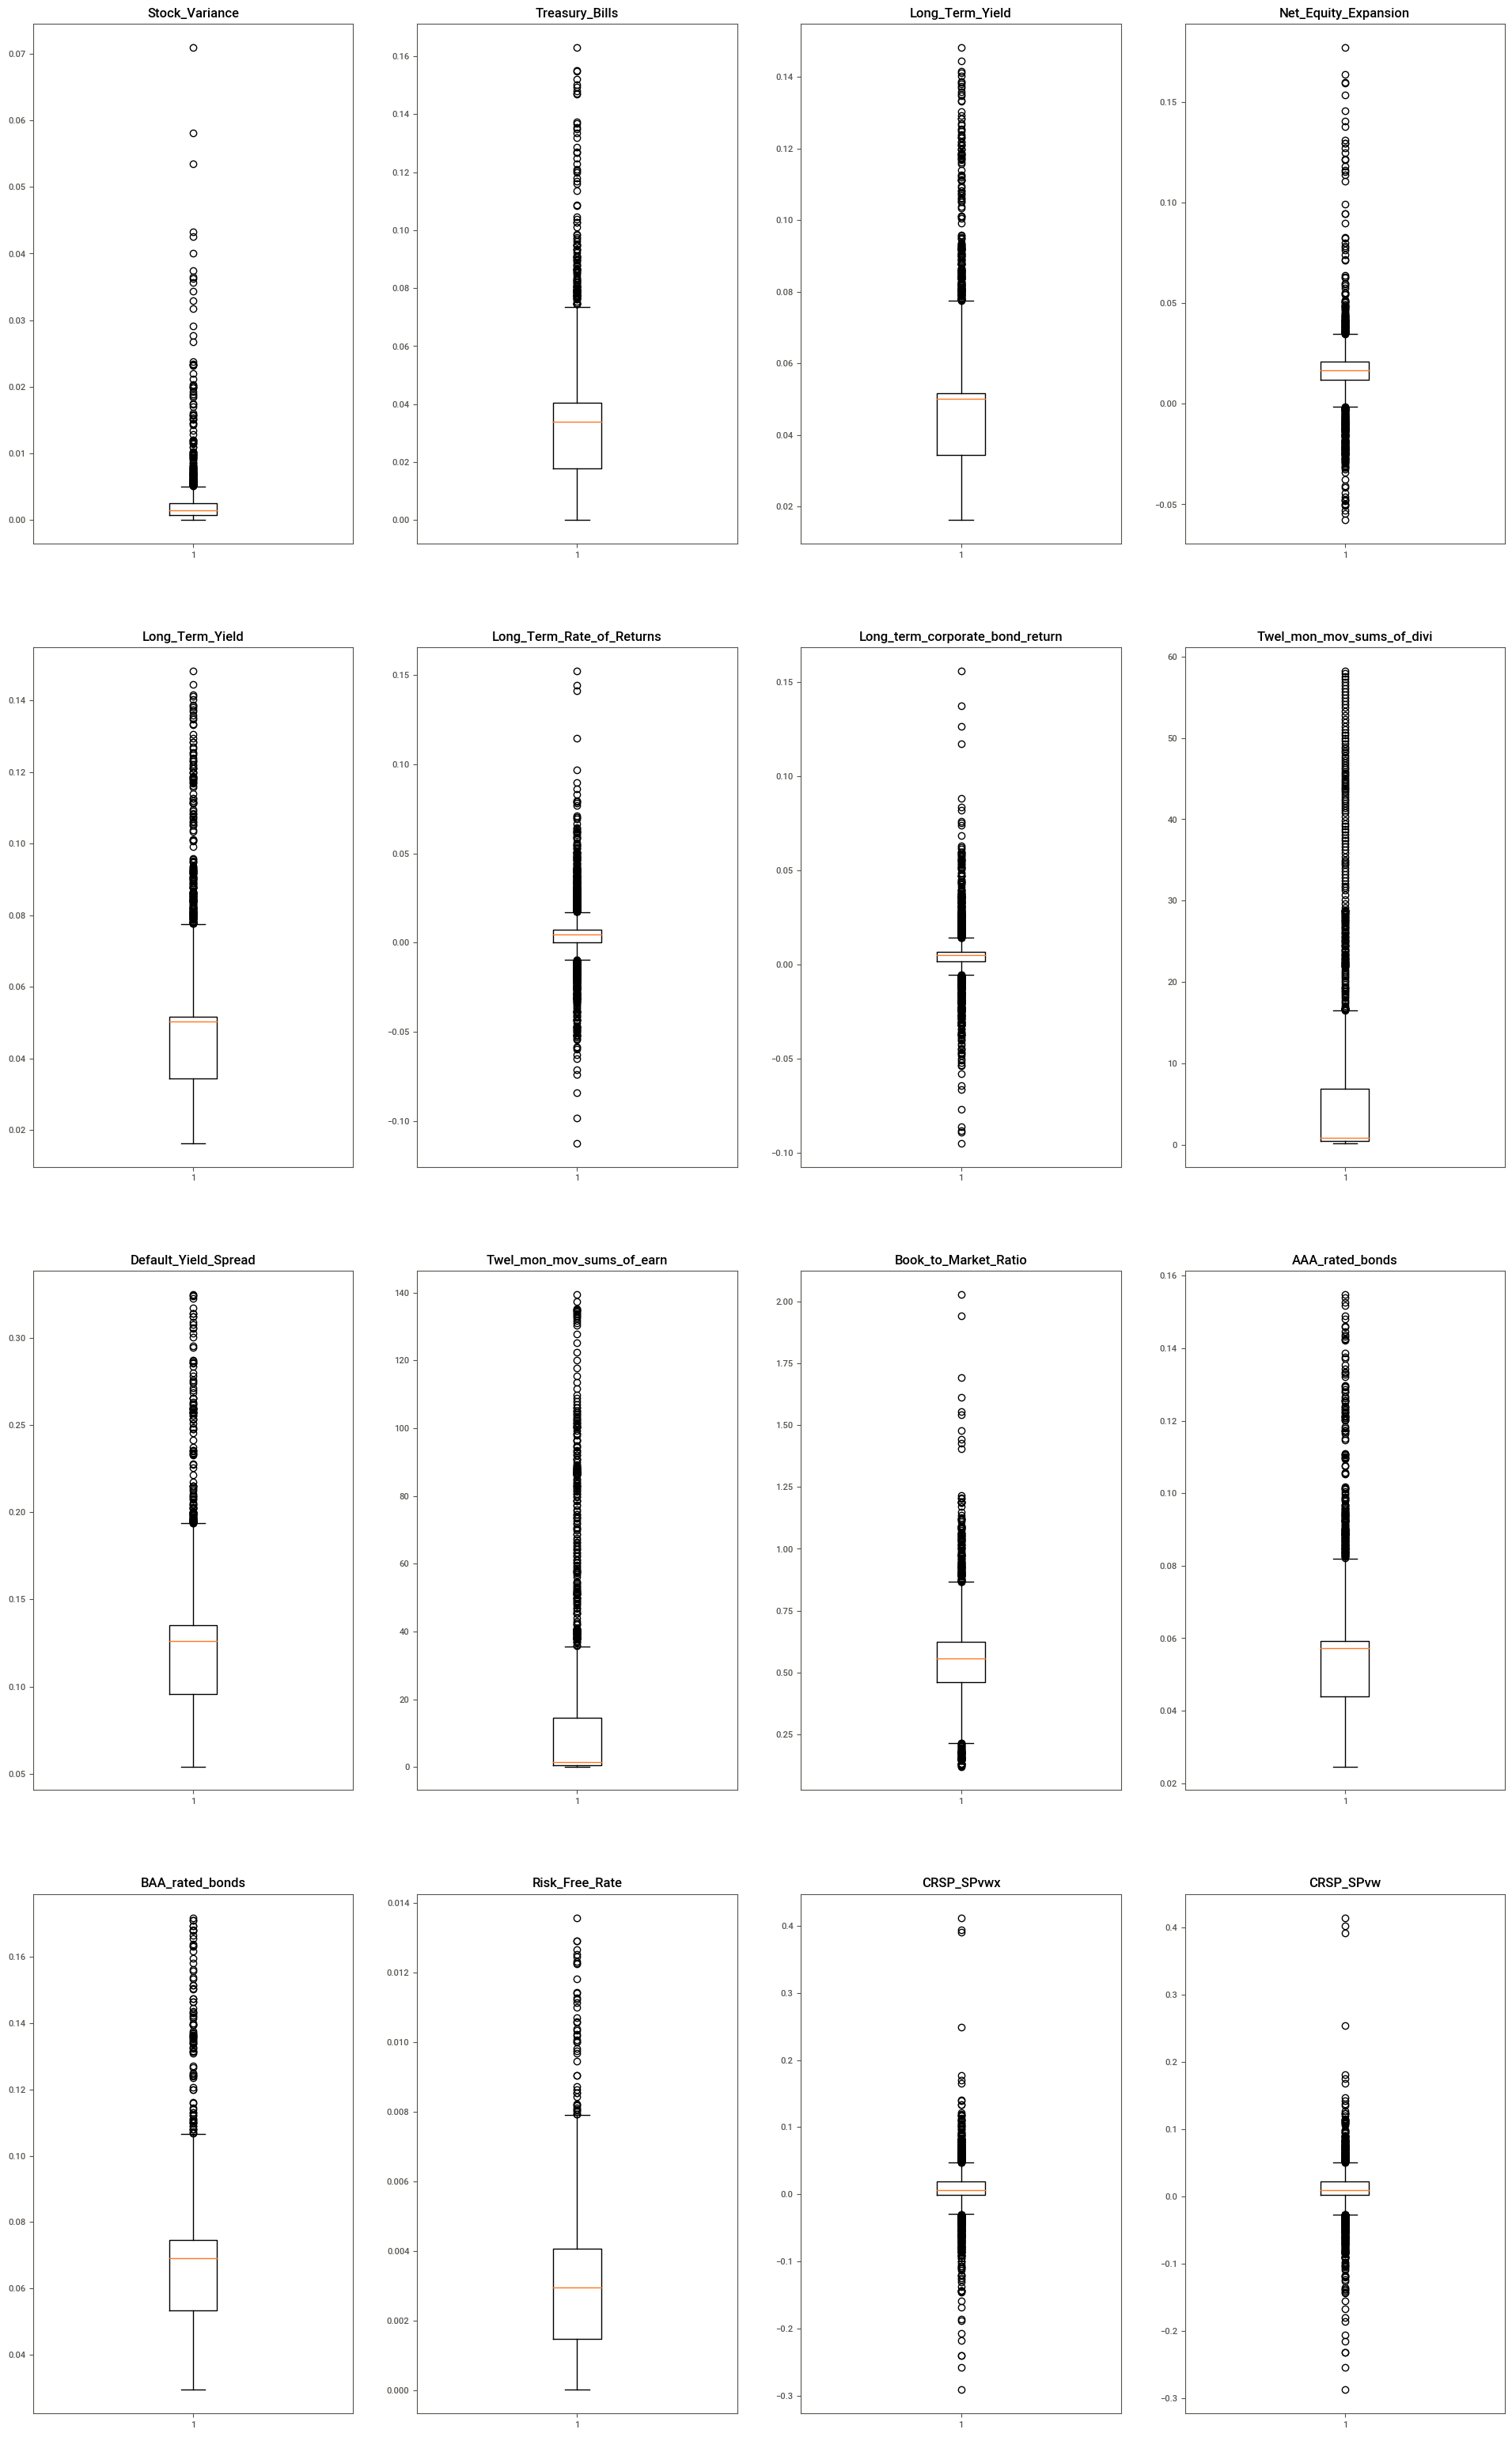

In [ ]:
# Get the names of the columns in the data frame
figure, axis = plt.subplots(4, 4, figsize=(24,40))


axis[0, 0].boxplot(df_EDA['Stock_Variance'].astype('float'))
axis[0, 0].set_title("Stock_Variance")
axis[0, 1].boxplot(df_EDA['Treasury_Bills'].astype('float'))
axis[0, 1].set_title("Treasury_Bills")
axis[0, 2].boxplot(df_EDA['Long_Term_Yield'].astype('float'))
axis[0, 2].set_title("Long_Term_Yield")
axis[0, 3].boxplot(df_EDA['Net_Equity_Expansion'].astype('float'))
axis[0, 3].set_title("Net_Equity_Expansion")
axis[1, 0].boxplot(df_EDA['Long_Term_Yield'].astype('float'))
axis[1, 0].set_title("Long_Term_Yield")
axis[1, 1].boxplot(df_EDA['Long_Term_Rate_of_Returns'].astype('float'))
axis[1, 1].set_title("Long_Term_Rate_of_Returns")
axis[1, 2].boxplot(df_EDA['Long_term_corporate_bond_return'].astype('float'))
axis[1, 2].set_title("Long_term_corporate_bond_return")
axis[1, 3].boxplot(df_EDA['Twel_mon_mov_sums_of_divi'].astype('float'))
axis[1, 3].set_title("Twel_mon_mov_sums_of_divi")
axis[2, 0].boxplot(df_EDA['Default_Yield_Spread'].astype('float'))
axis[2, 0].set_title("Default_Yield_Spread")
axis[2, 1].boxplot(df_EDA['Twel_mon_mov_sums_of_earn'].astype('float'))
axis[2, 1].set_title("Twel_mon_mov_sums_of_earn")
axis[2, 2].boxplot(df_EDA['Book_to_Market_Ratio'].astype('float'))
axis[2, 2].set_title("Book_to_Market_Ratio")
axis[2, 3].boxplot(df_EDA['AAA_rated_bonds'].astype('float'))
axis[2, 3].set_title("AAA_rated_bonds")
axis[3, 0].boxplot(df_EDA['BAA_rated_bonds'].astype('float'))
axis[3, 0].set_title("BAA_rated_bonds")
axis[3, 1].boxplot(df_EDA['Risk_Free_Rate'].astype('float'))
axis[3, 1].set_title("Risk_Free_Rate")
axis[3, 2].boxplot(df_EDA['CRSP_SPvwx'].astype('float'))
axis[3, 2].set_title("CRSP_SPvwx")
axis[3, 3].boxplot(df_EDA['CRSP_SPvw'].astype('float'))
axis[3, 3].set_title("CRSP_SPvw")


# Show the plot
plt.show();

# Q2: Non-stationary features
Are there any features that are not stationary? If so, fractionally differentiate them. (2 pt)


## Non-stationary features

In [ ]:
def getWeights_FFD(d,thres):
    w,k=[1.],1
    while True:
        w_=-w[-1]/k*(d-k+1)
        if abs(w_)<thres:break
        w.append(w_);k+=1
    return np.array(w[::-1]).reshape(-1,1)

def fracDiff_FFD(series,d,thres=1e-5):
    # Constant width window (new solution)
    w=getWeights_FFD(d,thres)
    df={}
    for name in series.columns:
        df_=pd.Series(series[name].values,index=series.index).fillna(method='ffill').dropna()
        x=pd.Series(0,index=df_.index)
        for k in range(w.shape[0]):
            x=x+w[k,0]*df_.shift(-k)
    #df[name]=x.dropna().copy(deep=True)
    df[name]=x.shift(k).copy(deep=True)
    df=pd.concat(df,axis=1)
    return df

def findMinD(series):
    for d in np.linspace(0,1,11):
        df_=fracDiff_FFD(series,d,thres=0.01).dropna()
        res=adfuller(df_.iloc[:,0].values,maxlag=1,regression='c',autolag=None)
        if (res[0]<=res[4]['5%']):
            return d
    return 1.0

In [ ]:
# df_q2.columns.to_list()
# log_SP=pd.DataFrame(np.log(df_q2['Long_Term_Rate_of_Returns'])) # Must use log prices for FD
# d=findMinD(log_SP)
# d

In [ ]:
df_q2 = df_imputed.copy()

ignore_column = ['Date_YYYYMM', 'Inflation',
                 'Long_Term_Rate_of_Returns', 
                 'Long_term_corporate_bond_return',
                 'Net_Equity_Expansion',
                 'Stock_Variance',
                 'Cross-Sectional_Premium',
                 'CRSP_SPvw',
                 'CRSP_SPvwx'
                 ]
for column in df_q2.columns:
    print('---column---',column)
    if column in ignore_column:
        continue
    log_col = pd.DataFrame(np.log(df_q2[column])) # Must use log for FD
    d=findMinD(log_col)
    print("d for {} is {}".format(column, d))
    log_col_FD=fracDiff_FFD(log_col,d,thres=0.01)
    results=adfuller(np.array(log_col_FD[log_col_FD[column].notnull()][column]), 
                     maxlag=1, regression='c', autolag=None)
    print("ADF Test Result using adfuller :")
    print("Test Statistic: ", results[0])
    print("p-value: ", results[1])
    print("critical_values: ", results[4])
    #print("Values:", df[column].values)
    print("---")



---column--- Date_YYYYMM
---column--- SP_500_Index
d for SP_500_Index is 0.6000000000000001
ADF Test Result using adfuller :
Test Statistic:  -2.874168625280657
p-value:  0.048435349213402305
critical_values:  {'1%': -3.4340332205127657, '5%': -2.8631669370039785, '10%': -2.567636130407771}
---
---column--- Twel_mon_mov_sums_of_divi
d for Twel_mon_mov_sums_of_divi is 1.0
ADF Test Result using adfuller :
Test Statistic:  -10.286400417571956
p-value:  3.665282192174889e-18
critical_values:  {'1%': -3.434018755659214, '5%': -2.8631605515716476, '10%': -2.5676327303470408}
---
---column--- Twel_mon_mov_sums_of_earn
d for Twel_mon_mov_sums_of_earn is 0.8
ADF Test Result using adfuller :
Test Statistic:  -3.8097156194501918
p-value:  0.0028094611184202385
critical_values:  {'1%': -3.43402700734663, '5%': -2.8631641942387542, '10%': -2.56763466996284}
---
---column--- Book_to_Market_Ratio
d for Book_to_Market_Ratio is 0.2
ADF Test Result using adfuller :
Test Statistic:  -3.926002361595923
p-

# Q3: RandomForestClassifier
Use the first two-thirds of the data as the train set, setting your random seed to 1, and train a random forest using Scikit-learn’s RandomForestClassifier using the default hyperparameters. What is the predictive accuracy, F1, and AUC score on the train set and the test set? (3 pt)

## Train and Test

In [ ]:
# df = pd.read_csv(w4_files+"/PredictorData2019.csv")
# df['yyyymm'] = pd.to_datetime(df['yyyymm'], 
#                               format='%Y%m', errors='coerce').dropna()
# df.head(2)
# df['Index'] = df['Index'].str.replace(',', '').astype(float)

# df_EDA_dt = df['yyyymm']
# df_EDA_temp = df.drop('yyyymm', axis=1)

# # Impute missing values in the other columns using the SimpleImputer
# my_imputer = SimpleImputer()
# imputed_temp = my_imputer.fit_transform(df_EDA_temp)

# # Convert the imputed data back into a DataFrame
# imputed_temp_df = pd.DataFrame(imputed_temp, columns=df_EDA_temp.columns)

# # Concatenate the two DataFrames back together
# df_imputed = pd.concat([df_EDA_dt, imputed_temp_df], axis=1)
# df_imputed['yyyymm'] = pd.to_datetime(df_imputed['yyyymm'])

# print("\n\n Missing Values after Imputing \n",df_imputed.isna().sum())
# df_imputed.head(2)

In [ ]:
df_imputed.shape
df_q3 = df_imputed.copy()


(1788, 19)

In [ ]:
df_q3['Excess_monthly_return'] = (df_q3['CRSP_SPvw'] - df_q3['Risk_Free_Rate'])


In [ ]:
df_q3['Excess_monthly_return'].describe()
print('\n')
binary = df_q3['Excess_monthly_return'] > 0
binary.value_counts()

df_q3['EXM_binary'] = binary.astype(int)
print('\n')
df_q3['EXM_binary'].value_counts()

count    1788.000000
mean        0.006429
std         0.042949
min        -0.287836
25%        -0.000787
50%         0.006307
75%         0.019333
max         0.413937
Name: Excess_monthly_return, dtype: float64

True     1334
False     454
Name: Excess_monthly_return, dtype: int64

1    1334
0     454
Name: EXM_binary, dtype: int64

In [ ]:
 #print("\n\n Missing Values before dropping/Imputing \n",df_q3.isna().sum())

 #df_q3 = df_q3.dropna()
df_q3.head(2)


,Date_YYYYMM,SP_500_Index,Twel_mon_mov_sums_of_divi,Twel_mon_mov_sums_of_earn,Book_to_Market_Ratio,Treasury_Bills,AAA_rated_bonds,BAA_rated_bonds,Long_Term_Yield,Net_Equity_Expansion,Risk_Free_Rate,Inflation,Long_Term_Rate_of_Returns,Long_term_corporate_bond_return,Stock_Variance,Cross-Sectional_Premium,CRSP_SPvw,CRSP_SPvwx,Default_Yield_Spread,Excess_monthly_return,EXM_binary
0,1871-01-01,4.44,0.26,0.4,0.558793,0.034042,0.057263,0.069047,0.05018,0.016456,0.004967,0.00257,0.004793,0.005164,0.00249,0.000364,0.009451,0.006289,0.12631,0.004484,1
1,1871-02-01,4.50,0.26,0.4,0.558793,0.034042,0.057263,0.069047,0.05018,0.016456,0.004525,0.00257,0.004793,0.005164,0.00249,0.000364,0.009451,0.006289,0.12631,0.004927,1


In [ ]:
drop_columns = ['Date_YYYYMM', 'CRSP_SPvw', 'CRSP_SPvwx',
                'Risk_Free_Rate','Default_Yield_Spread', 'Excess_monthly_return',
                'BAA_rated_bonds']
# , 'Inflation',
#                  'Long_Term_Rate_of_Returns', 
#                  'Long_term_corporate_bond_return',
#                  'Net_Equity_Expansion',
#                  'Stock_Variance',
#                  'Cross-Sectional_Premium',
#                  'CRSP_SPvw',
#                  'CRSP_SPvwx', 'SP_500_Index']

np.random.seed(1)
X = df_q3.drop(drop_columns + ['EXM_binary'], axis=1)
#X = df_q3.drop("Excess_monthly_return", axis=1)
y = df_q3["EXM_binary"]
#y.head(2)
#y = np.digitize(y, bins=[0, 5, 10, 15, 20])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33)#,  random_state=1)

# Create a RandomForestClassifier object
clf = RandomForestClassifier()

# # Train the model and keep track of the validation accuracy
# best_val_acc = 0
# best_n_estimators = 0
# for n_estimators in range(1, 100):
#     clf.n_estimators = n_estimators
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     val_acc = accuracy_score(y_test, y_pred)
#     if val_acc > best_val_acc:
#         best_val_acc = val_acc
#         best_n_estimators = n_estimators
#     else:
#         break

# Set the best number of estimators and train the model on the entire dataset
#clf.n_estimators = best_n_estimators
clf.fit(X, y)


# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = clf.predict(X_test)


# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("\n\nTest set accuracy:", val_acc)

# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred, average='macro')
print("Test set F1 score:", f1)

# Calculate AUC on the test set
auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
print("Test set AUC:", auc)

# Predict the target values for the training data
y_train_pred = clf.predict(X_train)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("\n\nTraining set accuracy:", train_accuracy)

# Calculate F1 score on the training set
train_f1 = f1_score(y_train, y_train_pred, average='macro')
print("Training set F1 score:", train_f1)

# Calculate AUC on the training set
train_auc = roc_auc_score(y_train, y_train_pred, multi_class='ovr')
print("Training set AUC:", train_auc)

RandomForestClassifier()

RandomForestClassifier()



Test set accuracy: 0.739424703891709
Test set F1 score: 0.6535148343254266
Test set AUC: 0.6447115846050484


Training set accuracy: 1.0
Training set F1 score: 1.0
Training set AUC: 1.0


## Avoid Overfitting by early-stopping

In [ ]:
drop_columns = ['Date_YYYYMM', 'CRSP_SPvw', 'CRSP_SPvwx',
                'Risk_Free_Rate','Default_Yield_Spread', 'Excess_monthly_return',
                'BAA_rated_bonds']
# , 'Inflation',
#                  'Long_Term_Rate_of_Returns', 
#                  'Long_term_corporate_bond_return',
#                  'Net_Equity_Expansion',
#                  'Stock_Variance',
#                  'Cross-Sectional_Premium',
#                  'CRSP_SPvw',
#                  'CRSP_SPvwx', 'SP_500_Index']

np.random.seed(1)
X = df_q3.drop(drop_columns + ['EXM_binary'], axis=1)
#X = df_q3.drop("Excess_monthly_return", axis=1)
y = df_q3["EXM_binary"]
#y.head(2)
#y = np.digitize(y, bins=[0, 5, 10, 15, 20])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33)#,  random_state=1)

# Create a RandomForestClassifier object
clf = RandomForestClassifier()

# Train the model and keep track of the validation accuracy
best_val_acc = 0
best_n_estimators = 0
for n_estimators in range(1, 100):
    clf.n_estimators = n_estimators
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    val_acc = accuracy_score(y_test, y_pred)
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_n_estimators = n_estimators
    else:
        break

# Set the best number of estimators and train the model on the entire dataset
clf.n_estimators = best_n_estimators
clf.fit(X, y)


# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = clf.predict(X_test)


# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("\n\nTest set accuracy:", val_acc)

# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred, average='macro')
print("Test set F1 score:", f1)

# Calculate AUC on the test set
auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
print("Test set AUC:", auc)

# Predict the target values for the training data
y_train_pred = clf.predict(X_train)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("\n\nTraining set accuracy:", train_accuracy)

# Calculate F1 score on the training set
train_f1 = f1_score(y_train, y_train_pred, average='macro')
print("Training set F1 score:", train_f1)

# Calculate AUC on the training set
train_auc = roc_auc_score(y_train, y_train_pred, multi_class='ovr')
print("Training set AUC:", train_auc)

RandomForestClassifier(n_estimators=1)

RandomForestClassifier(n_estimators=2)

RandomForestClassifier(n_estimators=3)

RandomForestClassifier(n_estimators=4)

RandomForestClassifier(n_estimators=5)

RandomForestClassifier(n_estimators=6)

RandomForestClassifier(n_estimators=5)

RandomForestClassifier(n_estimators=5)



Test set accuracy: 0.739424703891709
Test set F1 score: 0.626571647950859
Test set AUC: 0.6265716479508591


Training set accuracy: 0.9674185463659147
Training set F1 score: 0.9576891110843235
Training set AUC: 0.9535122631072286


# Q4: RandomizedSearchCV
Resetting the random seed to 1, use RandomizedSearchCV to apply hyperparameter optimization on the train set. Does this improve the three performance metrics computed in #3 on the train and test sets? (3 pt)

In [ ]:
drop_columns = ['Date_YYYYMM', 'CRSP_SPvw', 'CRSP_SPvwx',
                'Risk_Free_Rate', 'Default_Yield_Spread', 'Excess_monthly_return',
                'BAA_rated_bonds']

np.random.seed(1)

X = df_q3.drop(drop_columns + ['EXM_binary'], axis=1)
#X = df_q3.drop("Excess_monthly_return", axis=1)
y = df_q3["EXM_binary"]
y = np.digitize(y, bins=[0, 1, 5, 10, 100])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33)#,  random_state=1)

# Define the RandomForestClassifier
rfc = RandomForestClassifier()

# Define the hyperparameter distribution for RandomizedSearchCV
param_dist = {'n_estimators': np.arange(100, 500, 50),
              'max_depth': np.arange(5, 25),
              'min_samples_split': np.arange(2, 10),
              'min_samples_leaf': np.arange(1, 5)}


#Best Hyperparameters:  {'n_estimators': 300, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_depth': 15}

# Conduct the randomized search using RandomizedSearchCV
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5)
# random_state=0)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", random_search.best_params_)

# Predict the target using the best model
y_train_pred = random_search.predict(X_train)
y_test_pred = random_search.predict(X_test)

# Calculate the accuracy score
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy on the train set: ", accuracy_train)
print("Accuracy on the test set: ", accuracy_test)

# Calculate the F1 score
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)
print("F1 score on the train set: ", f1_train)
print("F1 score on the test set: ", f1_test)

# Calculate the AUC score
auc_train = roc_auc_score(y_train, y_train_pred)
auc_test = roc_auc_score(y_test, y_test_pred)
print("AUC score on the train set: ", auc_train)
print("AUC score on the test set: ", auc_test)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24]),
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   scoring='accuracy')

Best Hyperparameters:  {'n_estimators': 350, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 17}
Accuracy on the train set:  0.9958228905597326
Accuracy on the test set:  0.7681895093062606
F1 score on the train set:  0.9920508744038156
F1 score on the test set:  0.4408163265306122
AUC score on the train set:  0.9931033491860516
AUC score on the test set:  0.6371532776658029
